# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

Вопросы по заданию
Преподаватель: Наталья Баданина
Посчитать tpr и fpr в ноутбуке к лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Поcтроить график Precision - Recall на этих же данных.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=0)

Обучаем модель

In [10]:
model.fit(X_train, 
          Y_train)

LogisticRegression()

In [11]:
model.score(X_test, Y_test)

0.7319371727748691

## Посчитать tpr и fpr в ноутбуке к лекции.

In [17]:
# 1 метод подсчета TPR и FPR
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [14]:
TPR = tp/(tp+fn)
print(TPR)

0.3723228995057661


In [16]:
FPR =fp/(fp+tn)
print (FPR)

0.10053722179585571


In [26]:
# 2 метод подсчета 
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [28]:
# посмотрим что получилось
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9292091232671758)
(0.0, 0.0016474464579901153, 0.9292091232671756)
(0.0, 0.008237232289950576, 0.89998862795351)
(0.0007674597083653108, 0.008237232289950576, 0.8977304698527878)
(0.0007674597083653108, 0.019769357495881382, 0.8650840097292727)
(0.0030698388334612432, 0.019769357495881382, 0.8547129971134584)
(0.0030698388334612432, 0.023064250411861616, 0.8544826965581638)
(0.003837298541826554, 0.023064250411861616, 0.8521926884372871)
(0.003837298541826554, 0.03130148270181219, 0.8338303480746599)
(0.004604758250191865, 0.03130148270181219, 0.8336073228587285)
(0.004604758250191865, 0.03789126853377265, 0.8248957641619414)
(0.005372217958557176, 0.03789126853377265, 0.8231501847295927)
(0.005372217958557176, 0.04118616144975288, 0.8191949388049448)
(0.0061396776669224865, 0.04118616144975288, 0.8186308246896968)
(0.0061396776669224865, 0.04942339373970346, 0.8087952639694657)
(0.006907137375287797, 0.04942339373970346, 0.8081343487332543)
(0.006907137375287797, 0.057660

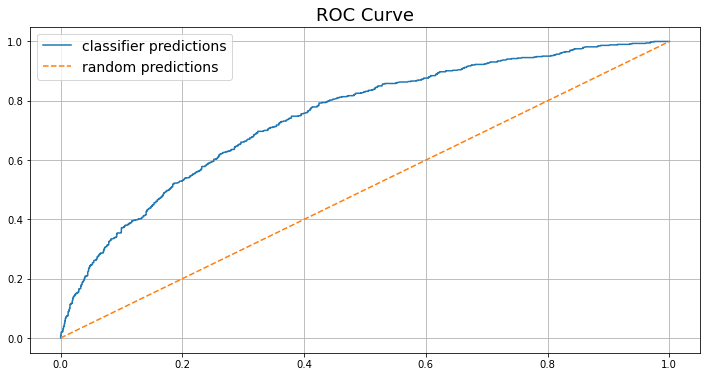

AUC is 0.75


In [23]:
import numpy as np
plt.figure(figsize=(12,6))
plt.title("ROC Curve", fontsize=18)
plt.grid()
plt.plot(fpr, tpr, label='classifier predictions')
plt.plot(np.linspace(0,1,100), 
         np.linspace(0,1,100), 
         linestyle='--', 
         label='random predictions')
plt.legend(fontsize=14)
plt.show()
print("AUC is %.2f" %auc(fpr, tpr))

## Поcтроить график Precision - Recall на этих же данных.

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

In [31]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

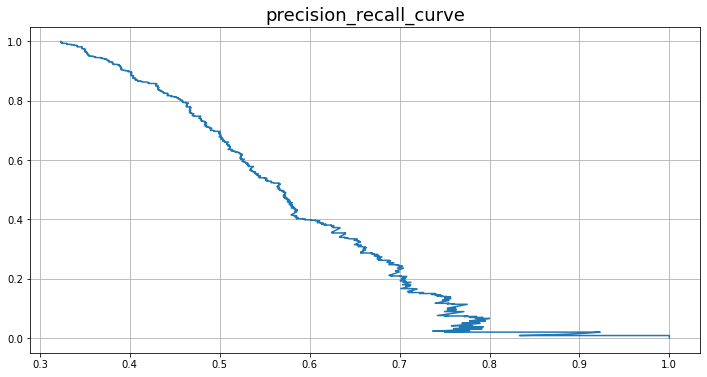

In [37]:
plt.figure(figsize=(12,6))
plt.title("precision_recall_curve", fontsize=18)
plt.grid()
plt.plot(pr, re)